In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                   StratifiedKFold, train_test_split)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, precision_recall_fscore_support)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [27]:
!pip install scikit-learn==1.3.1

EDA

Información de los registros

In [28]:
#Lectura de nuestro dataset
df = pd.read_csv("migraine.csv")

In [29]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            400 non-null    int64 
 1   Duration       400 non-null    int64 
 2   Frequency      400 non-null    int64 
 3   Location       400 non-null    int64 
 4   Character      400 non-null    int64 
 5   Intensity      400 non-null    int64 
 6   Nausea         400 non-null    int64 
 7   Vomit          400 non-null    int64 
 8   Phonophobia    400 non-null    int64 
 9   Photophobia    400 non-null    int64 
 10  Visual         400 non-null    int64 
 11  Sensory        400 non-null    int64 
 12  Dysphasia      400 non-null    int64 
 13  Dysarthria     400 non-null    int64 
 14  Vertigo        400 non-null    int64 
 15  Tinnitus       400 non-null    int64 
 16  Hypoacusis     400 non-null    int64 
 17  Diplopia       400 non-null    int64 
 18  Visual_defect  400 non-null   

In [30]:
#Información descriptiva
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


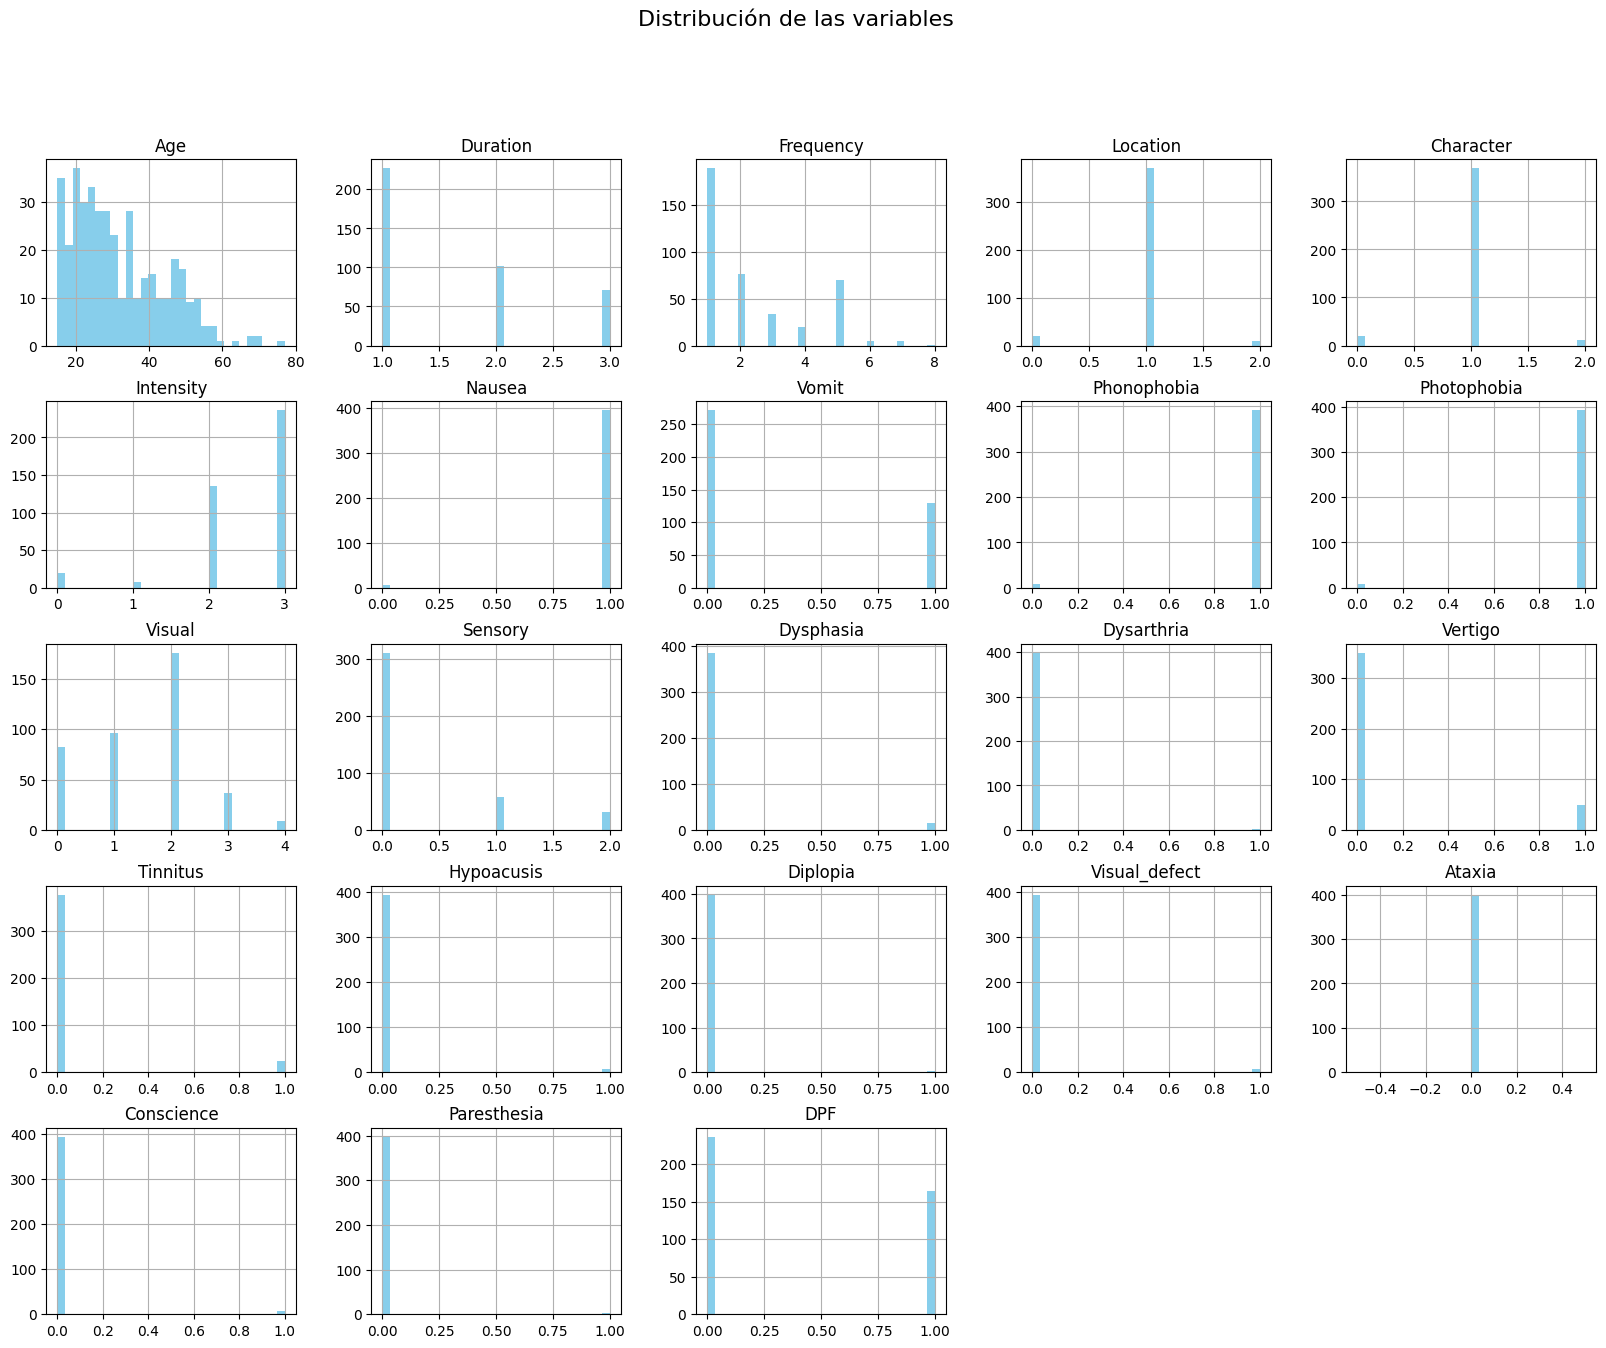

In [31]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(20, 15), bins=30, color='skyblue')
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

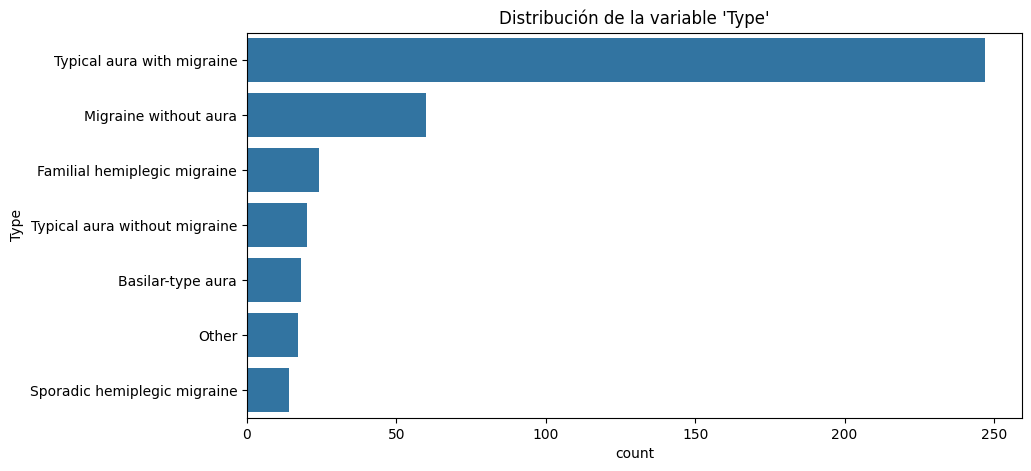

In [32]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de la variable '{col}'")
    plt.show()

In [33]:
#Visualización interactiva
fig = px.scatter_matrix(df, dimensions=['Age', 'Duration', 'Frequency'], color='Type')
fig.show()

In [34]:
#VISUALIZACIÓN CON PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.select_dtypes(include=np.number))
fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2], color=df['Type'])
fig.show()

In [35]:
#Valores faltantes
df.isnull().sum()

,0
Age,0
Duration,0
Frequency,0
Location,0
Character,0
Intensity,0
Nausea,0
Vomit,0
Phonophobia,0
Photophobia,0


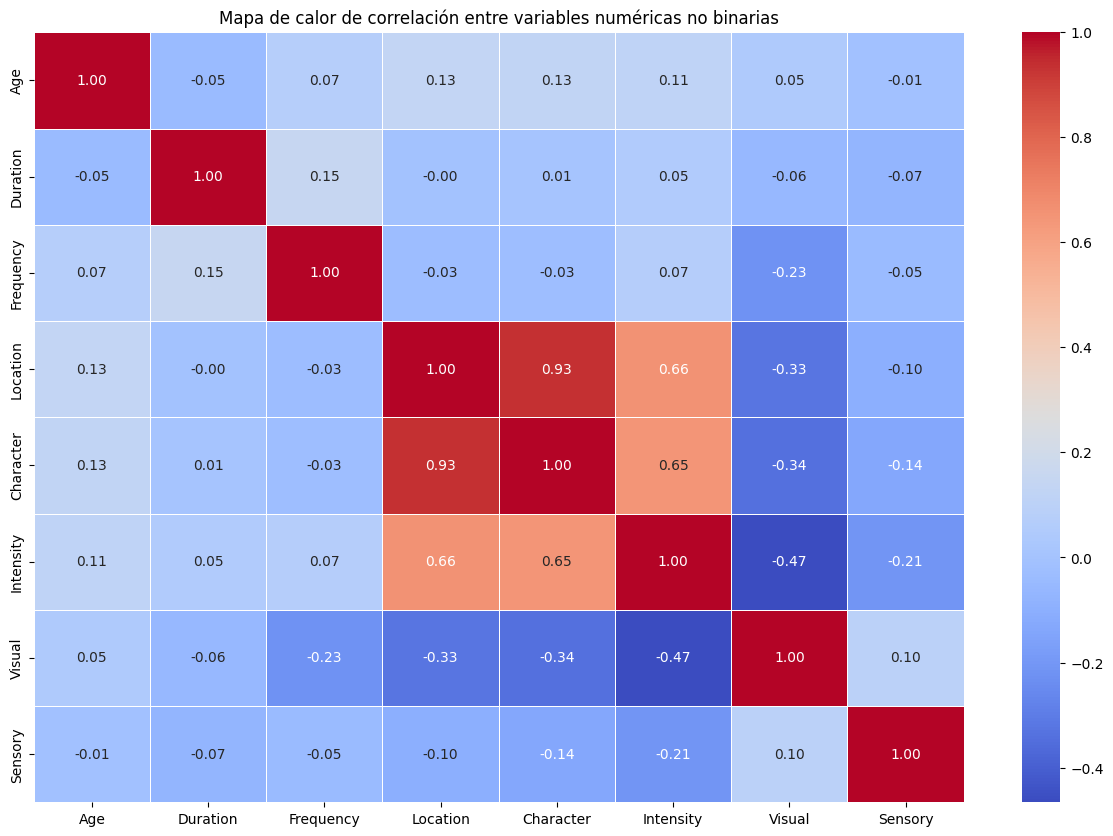

In [36]:
# Filtrar solo columnas numéricas no binarias
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() > 2]

# Crear la matriz de correlación
plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_cols].corr()

# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación entre variables numéricas no binarias")
plt.show()

In [37]:
#Vamos a eliminar la columna character porque está altamente correlacionada con location
# Eliminar la columna 'character'
df = df.drop(columns=['Character'])

# Verificar que la columna ha sido eliminada
print(df.head())

   Age  Duration  Frequency  Location  Intensity  Nausea  Vomit  Phonophobia  \
0   30         1          5         1          2       1      0            1   
1   50         3          5         1          3       1      1            1   
2   53         2          1         1          2       1      1            1   
3   45         3          5         1          3       1      0            1   
4   53         1          1         1          2       1      0            1   

   Photophobia  Visual  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1       1  ...        0         0           0         0   
1            1       2  ...        1         0           0         0   
2            1       2  ...        0         0           0         0   
3            1       2  ...        1         0           0         0   
4            1       4  ...        0         0           0         0   

   Visual_defect  Ataxia  Conscience  Paresthesia  DPF  \
0              0       0    

In [38]:
# Función para identificar outliers usando IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Analizar variables numéricas no binarias
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() > 2]

# Detectar y mostrar outliers por cada variable
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"\nOutliers en la columna '{col}': {len(outliers)}")
    print(outliers[[col]])




Outliers en la columna 'Age': 4
     Age
35    68
60    70
67    69
123   77

Outliers en la columna 'Duration': 0
Empty DataFrame
Columns: [Duration]
Index: []

Outliers en la columna 'Frequency': 0
Empty DataFrame
Columns: [Frequency]
Index: []

Outliers en la columna 'Location': 29
     Location
249         2
274         0
352         0
353         0
354         0
355         0
356         0
357         0
358         0
359         0
360         0
361         0
362         0
363         0
364         0
365         0
366         0
367         0
368         0
369         0
370         0
371         2
373         2
375         2
377         2
379         2
381         2
382         2
384         2

Outliers en la columna 'Intensity': 20
     Intensity
274          0
352          0
353          0
354          0
355          0
356          0
357          0
358          0
359          0
360          0
361          0
362          0
363          0
364          0
365          0
366          

 Los valores extremos tienen sentido dentro del ámbito del análisis. Por ejemplo, en este conjunto de datos sobre pacientes con migraña, es razonable esperar que haya personas mayores con una edad de 67 años (incluso si es un valor alto en el contexto de la distribución) porque podría representar a un subgrupo relevante de la población. No es común porque los síntomas de migraña se van atenuando con la edad pero es posible.

In [39]:
# Separar las clases en subconjuntos (esto depende de cómo tienes tus clases definidas en tus datos)
data_1 = df[df['Type'] == 'Basilar-type aura']
data_2 = df[df['Type'] == 'Familial hemiplegic migraine']
data_3 = df[df['Type'] == 'Migraine without aura']
data_4 = df[df['Type'] == 'Other']
data_5 = df[df['Type'] == 'Sporadic hemiplegic migraine']
data_6 = df[df['Type'] == 'Typical aura with migraine']
data_7 = df[df['Type'] == 'Typical aura without migraine']

# Resampling: equilibrar el número de muestras en cada clase
data_1_resample = resample(data_1, n_samples=300, random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=300, random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=300, random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=300, random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=300, random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=300, random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=300, random_state=123, replace=True)

# Unir todas las clases balanceadas en un solo DataFrame
df_resampled = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample,
                          data_5_resample, data_6_resample, data_7_resample])

# Verificar el balance después de aplicar el resampling
print(df_resampled['Type'].value_counts())

Type
Basilar-type aura                300
Familial hemiplegic migraine     300
Migraine without aura            300
Other                            300
Sporadic hemiplegic migraine     300
Typical aura with migraine       300
Typical aura without migraine    300
Name: count, dtype: int64


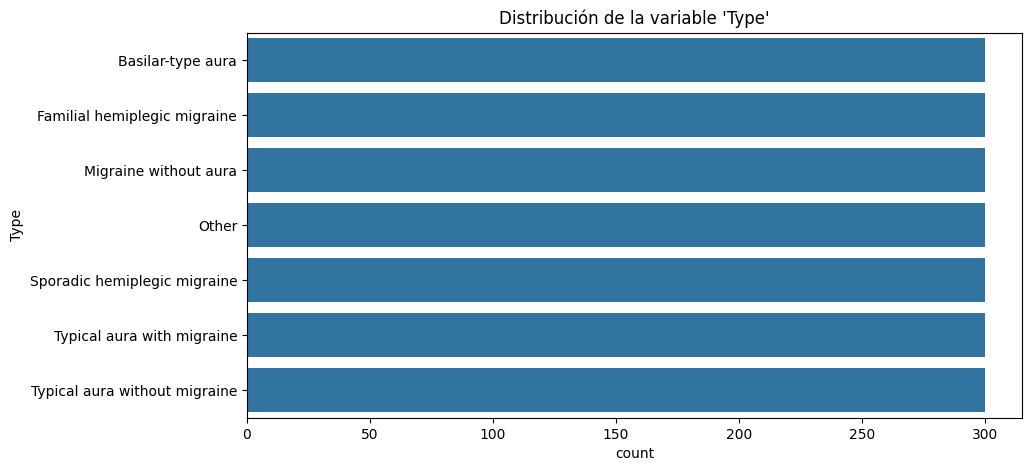

In [40]:
cat_cols = df_resampled.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df_resampled, order=df_resampled[col].value_counts().index)
    plt.title(f"Distribución de la variable '{col}'")
    plt.show()

#REGRESIÓN LOGÍSTICA

In [41]:
# Separar las características y la variable objetivo
X = df_resampled.drop(columns=['Type'])
y = df_resampled['Type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Verificar la distribución de clases
print(f"Distribución en el entrenamiento:\n{y_train.value_counts()}")
print(f"Distribución en el test:\n{y_test.value_counts()}")


Distribución en el entrenamiento:
Type
Migraine without aura            219
Typical aura without migraine    214
Other                            213
Sporadic hemiplegic migraine     213
Familial hemiplegic migraine     205
Basilar-type aura                205
Typical aura with migraine       201
Name: count, dtype: int64
Distribución en el test:
Type
Typical aura with migraine       99
Familial hemiplegic migraine     95
Basilar-type aura                95
Other                            87
Sporadic hemiplegic migraine     87
Typical aura without migraine    86
Migraine without aura            81
Name: count, dtype: int64


Se ha genera más muestra de la clase minoritaria mediante técnicas como SMOTE (Synthetic Minority Over-sampling Technique), que crea ejemplos sintéticos en lugar de duplicar instancias existentes. Esto se ha realizado porque la variable objetivo estaba bastante desbalanceada.

In [42]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística con balance de clases
logreg = LogisticRegression(random_state=42, max_iter=2000, solver='saga', class_weight='balanced')

# Ajustar el parámetro C usando GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo con los datos balanceados y escalados
grid_search.fit(X_train_scaled, y_train)

# Imprimir el mejor valor de C encontrado
print(f"Mejor valor de C encontrado: {grid_search.best_params_['C']}")

# Realizar predicciones con el modelo optimizado
y_test_pred = grid_search.predict(X_test_scaled)

# Evaluar el modelo en el conjunto de test
print(f"Precisión en test: {accuracy_score(y_test, y_test_pred)}")
print(f"Matriz de confusión en test:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Reporte de clasificación en test:\n{classification_report(y_test, y_test_pred)}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor valor de C encontrado: 10
Precisión en test: 0.9682539682539683
Matriz de confusión en test:
[[95  0  0  0  0  0  0]
 [ 0 94  0  0  0  1  0]
 [ 0  0 75  6  0  0  0]
 [ 0  0  0 87  0  0  0]
 [ 0  0  0  0 87  0  0]
 [ 0  7  0  0  6 86  0]
 [ 0  0  0  0  0  0 86]]
Reporte de clasificación en test:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00        95
 Familial hemiplegic migraine       0.93      0.99      0.96        95
        Migraine without aura       1.00      0.93      0.96        81
                        Other       0.94      1.00      0.97        87
 Sporadic hemiplegic migraine       0.94      1.00      0.97        87
   Typical aura with migraine       0.99      0.87      0.92        99
Typical aura without migraine       1.00      1.00      1.00        86

                     accuracy                           0.97       6

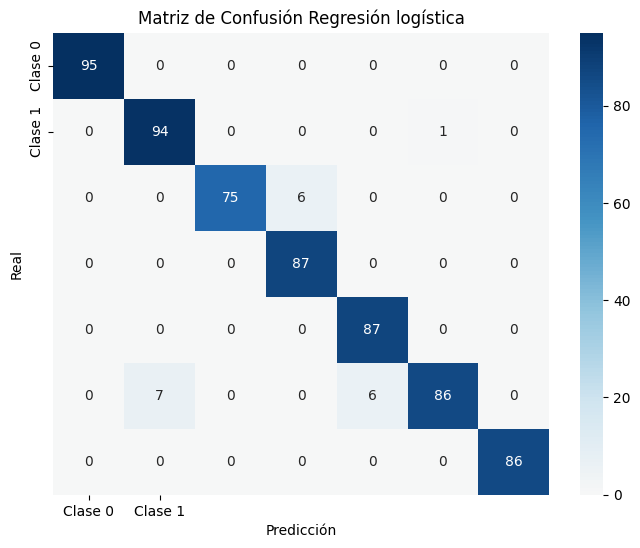

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Crear un gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdBu', center=0, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión Regresión logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#SVC

In [44]:
# Crear el modelo SVM con balance de clases
svm = SVC(random_state=42, class_weight='balanced')

# Ajustar el parámetro C y kernel usando GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo
grid_search_svm.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_test_pred_svm = grid_search_svm.predict(X_test_scaled)
print(f"Mejor parámetro SVM: {grid_search_svm.best_params_}")
print(f"Precisión en test: {accuracy_score(y_test, y_test_pred_svm)}")
print(f"Matriz de confusión:\n{confusion_matrix(y_test, y_test_pred_svm)}")
print(f"Reporte de clasificación:\n{classification_report(y_test, y_test_pred_svm)}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor parámetro SVM: {'C': 100, 'kernel': 'rbf'}
Precisión en test: 0.973015873015873
Matriz de confusión:
[[95  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0]
 [ 0  0 75  6  0  0  0]
 [ 0  0  0 87  0  0  0]
 [ 0  0  0  0 87  0  0]
 [ 0  5  0  0  6 88  0]
 [ 0  0  0  0  0  0 86]]
Reporte de clasificación:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00        95
 Familial hemiplegic migraine       0.95      1.00      0.97        95
        Migraine without aura       1.00      0.93      0.96        81
                        Other       0.94      1.00      0.97        87
 Sporadic hemiplegic migraine       0.94      1.00      0.97        87
   Typical aura with migraine       1.00      0.89      0.94        99
Typical aura without migraine       1.00      1.00      1.00        86

                     accuracy                           0.97       

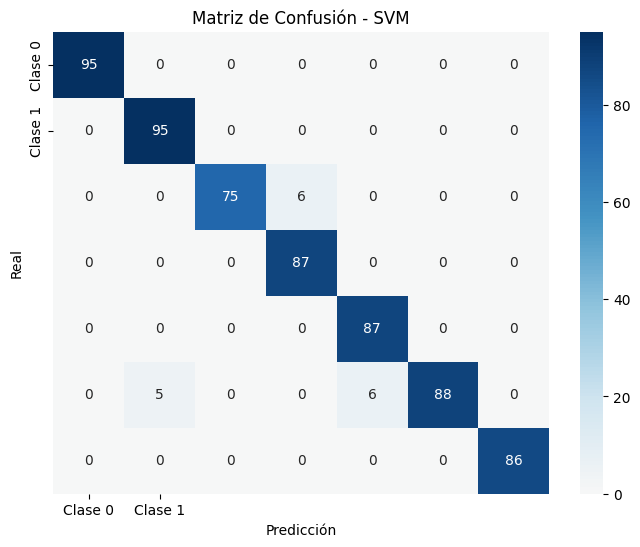

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Crear un gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='RdBu', center=0, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

XGBOOST

In [46]:
# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear el modelo XGBoost
xgb = XGBClassifier(random_state=42, scale_pos_weight=1, use_label_encoder=False, eval_metric='mlogloss')

# Ajustar hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Evaluar el modelo
y_test_pred_xgb = grid_search_xgb.predict(X_test_scaled)

# Decodificar las predicciones para obtener las clases originales
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred_xgb)

print(f"Mejor parámetro XGBoost: {grid_search_xgb.best_params_}")
print(f"Precisión en test: {accuracy_score(y_test, y_test_pred_decoded)}")
print(f"Matriz de confusión:\n{confusion_matrix(y_test, y_test_pred_decoded)}")
print(f"Reporte de clasificación:\n{classification_report(y_test, y_test_pred_decoded)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.




Mejor parámetro XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Precisión en test: 0.9936507936507937
Matriz de confusión:
[[95  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0]
 [ 0  0 81  0  0  0  0]
 [ 0  0  0 87  0  0  0]
 [ 0  0  0  0 87  0  0]
 [ 2  2  0  0  0 95  0]
 [ 0  0  0  0  0  0 86]]
Reporte de clasificación:
                               precision    recall  f1-score   support

            Basilar-type aura       0.98      1.00      0.99        95
 Familial hemiplegic migraine       0.98      1.00      0.99        95
        Migraine without aura       1.00      1.00      1.00        81
                        Other       1.00      1.00      1.00        87
 Sporadic hemiplegic migraine       1.00      1.00      1.00        87
   Typical aura with migraine       1.00      0.96      0.98        99
Typical aura without migraine       1.00      1.00      1.00        86

                     accuracy                           0.99       630
                    

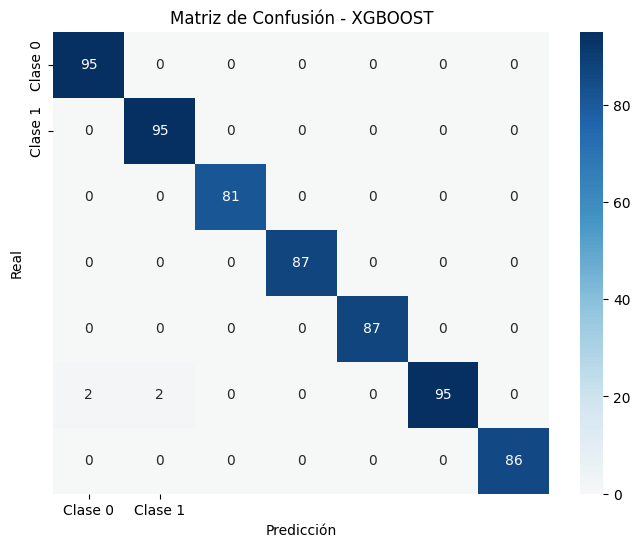

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test, y_test_pred_decoded)

# Crear un gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='RdBu', center=0, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión - XGBOOST')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Regresión Logística y SVC en scikit-learn aceptan directamente etiquetas categóricas en formato de cadenas o texto y las manejan internamente.
Sin embargo, en modelos como XGBoost, se requiere que las etiquetas sean numéricas.

#RANDOM FOREST

In [48]:
# Definir el modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de los mejores hiperparámetros
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo
grid_search_rf.fit(X_train_scaled, y_train)

# Imprimir el mejor conjunto de hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")

# Realizar predicciones
y_test_pred = grid_search_rf.predict(X_test_scaled)

# Evaluar el modelo
print(f"Precisión en test: {accuracy_score(y_test, y_test_pred)}")
print(f"Matriz de confusión en test:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Reporte de clasificación en test:\n{classification_report(y_test, y_test_pred)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Precisión en test: 0.9936507936507937
Matriz de confusión en test:
[[95  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0]
 [ 0  0 81  0  0  0  0]
 [ 0  0  0 87  0  0  0]
 [ 0  0  0  0 87  0  0]
 [ 2  2  0  0  0 95  0]
 [ 0  0  0  0  0  0 86]]
Reporte de clasificación en test:
                               precision    recall  f1-score   support

            Basilar-type aura       0.98      1.00      0.99        95
 Familial hemiplegic migraine       0.98      1.00      0.99        95
        Migraine without aura       1.00      1.00      1.00        81
                        Other       1.00      1.00      1.00        87
 Sporadic hemiplegic migraine       1.00      1.00      1.00        87
   Typical aura with migraine       1.00      0.96      0.98        99
Typical aura without migraine       1.00      1.00      1.00        86

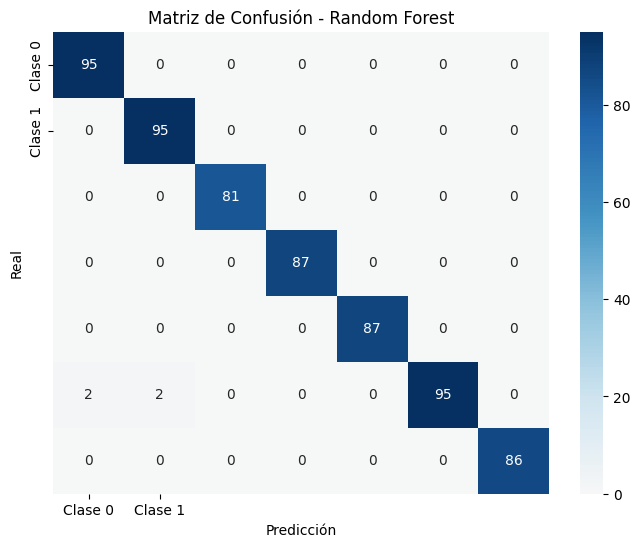

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test, y_test_pred)

# Crear un gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='RdBu', center=0, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#REDES NEURONALES

In [50]:
# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir las etiquetas a formato one-hot
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Salida multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping para detener el entrenamiento si no mejora en 10 épocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train_categorical,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_categorical),
    callbacks=[early_stopping]
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Precisión en test: {test_accuracy:.4f}')

# Predecir y convertir a etiquetas originales
y_pred = model.predict(X_test_scaled)
y_pred_classes = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Mostrar el reporte de clasificación
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3127 - loss: 1.9449 - val_accuracy: 0.8143 - val_loss: 1.3745
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7648 - loss: 0.8256 - val_accuracy: 0.9190 - val_loss: 0.8562
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8738 - loss: 0.4789 - val_accuracy: 0.9317 - val_loss: 0.5028
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9182 - loss: 0.3156 - val_accuracy: 0.9571 - val_loss: 0.2856
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8944 - loss: 0.3205 - val_accuracy: 0.9492 - val_loss: 0.1807
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9255 - loss: 0.2417 - val_accuracy: 0.9571 - val_loss: 0.1350
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9148 - loss: 0.2220 - val_accuracy: 0.9603 - val_loss: 0.1071
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.1929 - val_accuracy: 0.9683 - 

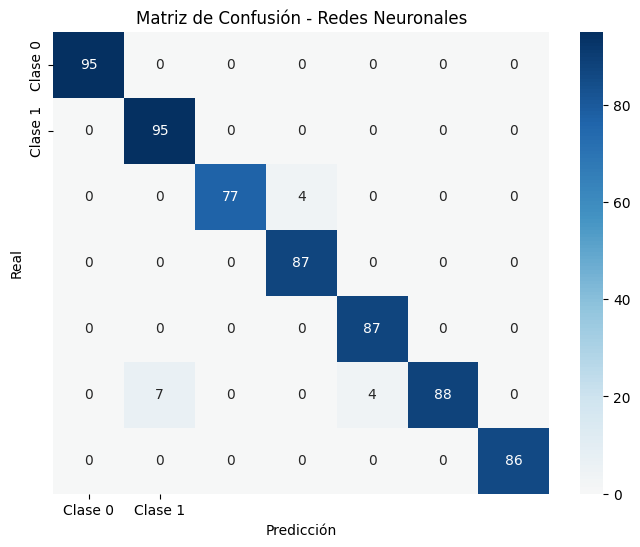

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_classes)

# Crear un gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='RdBu', center=0, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión - Redes Neuronales')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()